In [3]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')

In [48]:
population = sns.distributions.stats.expon()

var = population.var()

def clt_limits(sample, alpha, var):
    norm = sns.distributions.stats.norm(loc=sample.mean(), scale=np.sqrt(var / len(sample)))
    return (norm.ppf(alpha / 2), norm.ppf(1 - alpha / 2))

In [54]:
def students_t_limits(sample, alpha, var=None):
    n = len(sample)
    t = sns.distributions.stats.t(df=n-1, loc=sample.mean(), scale=sample.std(ddof=1) / np.sqrt(n))
    return (t.ppf(alpha / 2), t.ppf(1 - alpha / 2))

In [59]:
np.random.seed(0)

# 95% confidence interval
alpha = .05

n_samples = 100000
sample_size = (10, 50, 100, 500, 1000)

coverage_clt = []
coverage_t = []

for n in sample_size:
    samples = population.rvs((n_samples, n))
    ci = np.apply_along_axis(
        clt_limits,
        axis=-1,
        arr=samples,
        alpha=alpha,
        var=var
    )
    coverage_clt.append(((population.mean() >= ci[:, 0]) & (population.mean() <= ci[:, 1])).mean())

    ci = np.apply_along_axis(
        students_t_limits,
        axis=-1,
        arr=samples,
        alpha=alpha,
        var=var
    )
    coverage_t.append(((population.mean() >= ci[:, 0]) & (population.mean() <= ci[:, 1])).mean())

coverage_clt = np.array(coverage_clt)
coverage_t = np.array(coverage_t)

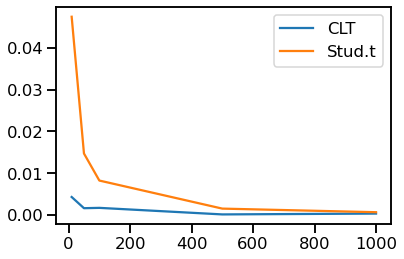

In [61]:
plt.plot(sample_size, np.abs(coverage_clt - (1 - alpha)), label="CLT")
plt.plot(sample_size, np.abs(coverage_t - (1 - alpha)), label="Stud.t")
plt.legend();

In [66]:
population = sns.distributions.stats.norm(loc=3, scale=2)

var = population.var()

# 95% confidence interval
alpha = .05

n_samples = 100000
sample_size = (2, 5, 10, 20, 50)

coverage_clt = []
coverage_t = []

for n in sample_size:
    samples = population.rvs((n_samples, n))
    ci = np.apply_along_axis(
        clt_limits,
        axis=-1,
        arr=samples,
        alpha=alpha,
        var=var
    )
    coverage_clt.append(((population.mean() >= ci[:, 0]) & (population.mean() <= ci[:, 1])).mean())

    ci = np.apply_along_axis(
        students_t_limits,
        axis=-1,
        arr=samples,
        alpha=alpha,
        var=var
    )
    coverage_t.append(((population.mean() >= ci[:, 0]) & (population.mean() <= ci[:, 1])).mean())

coverage_clt = np.array(coverage_clt)
coverage_t = np.array(coverage_t)

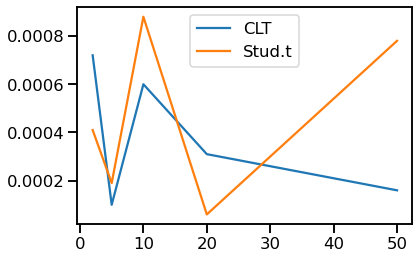

In [67]:
plt.plot(sample_size, np.abs(coverage_clt - (1 - alpha)), label="CLT")
plt.plot(sample_size, np.abs(coverage_t - (1 - alpha)), label="Stud.t")
plt.legend();